In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [4]:
data = {
    "name": ["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Helen", "Ian", "Jack"],
    "age": [20, 22, 21, 23, 20, 22, 21, 23, 20, 22],
    "math": [85, 45, 70, 30, 95, 65, 40, 88, 55, 25],
    "science": [78, 50, 60, 35, 92, 70, 42, 85, 58, 28],
    "english": [80, 55, 65, 32, 90, 68, 48, 87, 53, 30],
    "history": [82, 48, 68, 34, 94, 60, 46, 89, 50, 27],
    "computer": [90, 40, 72, 28, 96, 75, 44, 91, 52, 26],
    "performance": ["Pass", "Fail", "Pass", "Fail", "Pass", "Pass", "Fail", "Pass", "Fail", "Fail"]
}

In [5]:
df = pd.DataFrame(data)

In [6]:
# Calculate total marks
df["total"] = df[["math","science","english","history","computer"]].sum(axis=1)


In [7]:
df.to_csv("students_train.csv", index=False)

In [8]:
df

,name,age,math,science,english,history,computer,performance,total
0,Alice,20,85,78,80,82,90,Pass,415
1,Bob,22,45,50,55,48,40,Fail,238
2,Charlie,21,70,60,65,68,72,Pass,335
3,David,23,30,35,32,34,28,Fail,159
4,Eva,20,95,92,90,94,96,Pass,467
5,Frank,22,65,70,68,60,75,Pass,338
6,Grace,21,40,42,48,46,44,Fail,220
7,Helen,23,88,85,87,89,91,Pass,440
8,Ian,20,55,58,53,50,52,Fail,268
9,Jack,22,25,28,30,27,26,Fail,136


In [9]:
# Basic EDA
print("First 5 rows : \n",df.head())

First 5 rows : 
       name  age  math  science  english  history  computer performance  total
0    Alice   20    85       78       80       82        90        Pass    415
1      Bob   22    45       50       55       48        40        Fail    238
2  Charlie   21    70       60       65       68        72        Pass    335
3    David   23    30       35       32       34        28        Fail    159
4      Eva   20    95       92       90       94        96        Pass    467


In [10]:
print("Data Info : \n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         10 non-null     object
 1   age          10 non-null     int64 
 2   math         10 non-null     int64 
 3   science      10 non-null     int64 
 4   english      10 non-null     int64 
 5   history      10 non-null     int64 
 6   computer     10 non-null     int64 
 7   performance  10 non-null     object
 8   total        10 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 852.0+ bytes
Data Info : 
 None


In [11]:
print("Data description : \n",df.describe())

Data description : 
              age       math    science   english    history   computer  \
count  10.000000  10.000000  10.000000  10.00000  10.000000  10.000000   
mean   21.400000  59.800000  59.800000  60.80000  59.800000  61.400000   
std     1.173788  24.796057  21.472463  21.11766  22.972447  26.679997   
min    20.000000  25.000000  28.000000  30.00000  27.000000  26.000000   
25%    20.250000  41.250000  44.000000  49.25000  46.500000  41.000000   
50%    21.500000  60.000000  59.000000  60.00000  55.000000  62.000000   
75%    22.000000  81.250000  76.000000  77.00000  78.500000  86.250000   
max    23.000000  95.000000  92.000000  90.00000  94.000000  96.000000   

            total  
count   10.000000  
mean   301.600000  
std    116.142824  
min    136.000000  
25%    224.500000  
50%    301.500000  
75%    395.750000  
max    467.000000  


In [12]:
print("Value counts for performance : \n",df['performance'].value_counts())

Value counts for performance : 
 performance
Pass    5
Fail    5
Name: count, dtype: int64


Text(0, 0.5, 'Count')

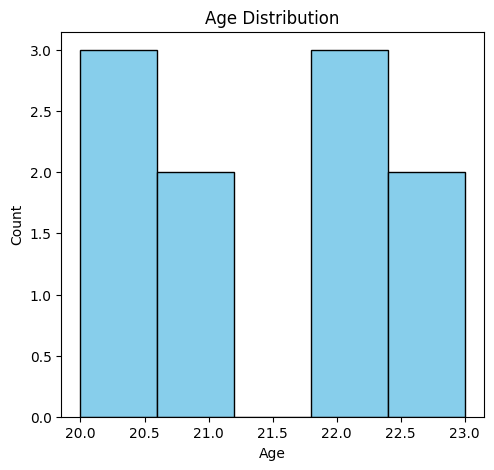

In [18]:
# Histogram

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df['age'], bins=5, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

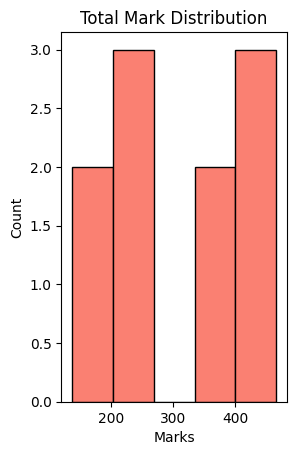

In [19]:
plt.subplot(1,2,2)
plt.hist(df['total'], bins=5, color='salmon', edgecolor='black')
plt.title("Total Mark Distribution")
plt.xlabel("Marks")
plt.ylabel("Count")
plt.show()

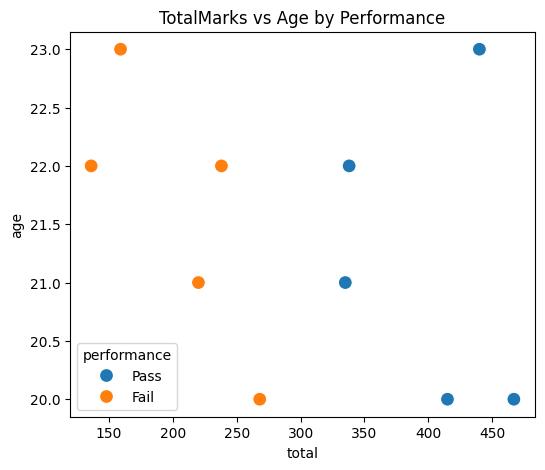

In [20]:
# Scatter plot

plt.figure(figsize=(6,5))
sns.scatterplot(x="total", y="age", hue="performance", data=df, s=100)
plt.title("TotalMarks vs Age by Performance")
plt.show()

Text(0.5, 1.0, 'Total by Performance')

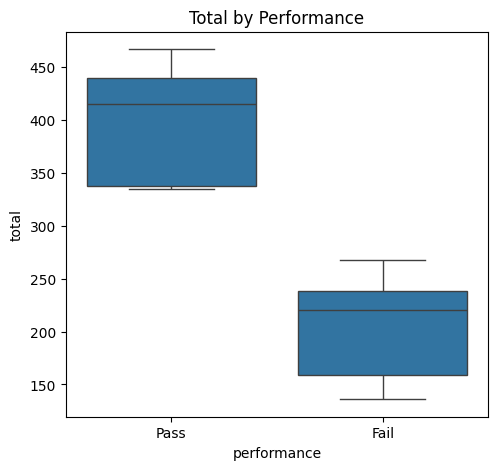

In [21]:
# Boxplot

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x="performance", y="total", data=df)
plt.title("Total by Performance")

Text(0.5, 1.0, 'Total Marks by Performance')

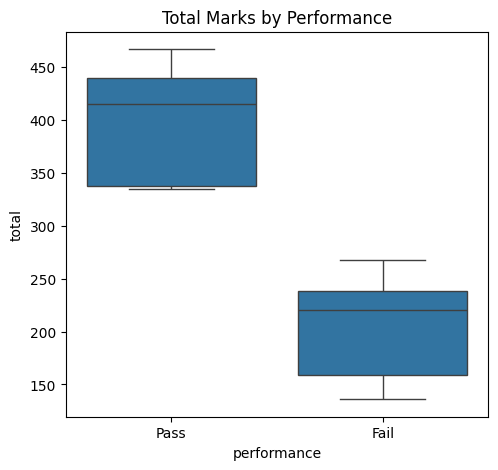

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x="performance", y="total", data=df)
plt.title("Total Marks by Performance")

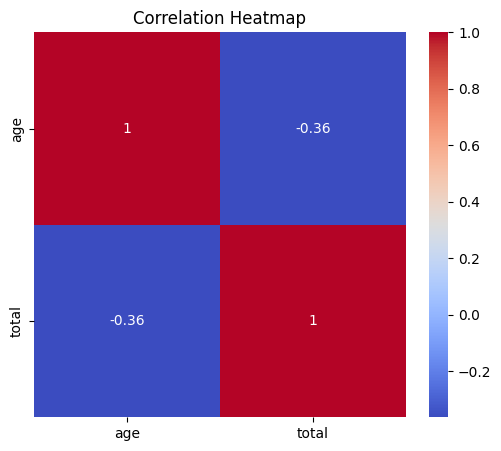

In [23]:
# correlation heatmap

plt.figure(figsize=(6,5))
sns.heatmap(df[['age','total']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [24]:
#Prepare Features & Target

X = df[['age','total']]
y = df['performance']

In [25]:
X

,age,total
0,20,415
1,22,238
2,21,335
3,23,159
4,20,467
5,22,338
6,21,220
7,23,440
8,20,268
9,22,136


In [26]:
y

0    Pass
1    Fail
2    Pass
3    Fail
4    Pass
5    Pass
6    Fail
7    Pass
8    Fail
9    Fail
Name: performance, dtype: object

In [27]:
#Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [28]:
X_train

,age,total
0,20,415
7,23,440
2,21,335
9,22,136
4,20,467
3,23,159
6,21,220


In [29]:
X_test

,age,total
8,20,268
1,22,238
5,22,338


In [30]:
y_train

0    Pass
7    Pass
2    Pass
9    Fail
4    Pass
3    Fail
6    Fail
Name: performance, dtype: object

In [31]:
y_test

8    Fail
1    Fail
5    Pass
Name: performance, dtype: object

In [32]:
# train model

model = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
# Evaluate model

y_pred =model.predict(X_test)

In [34]:
y_pred

array(['Fail', 'Fail', 'Pass'], dtype=object)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [36]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2 0]
 [0 1]]


In [37]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        Fail       1.00      1.00      1.00         2
        Pass       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [38]:
# save model

joblib.dump(model, "student_model.pkl")
print(" Model saved as student_model.pkl")

 Model saved as student_model.pkl
